Marie Nguyen 

 December, 2021
<center>

### Lab 01

<center>

### Part 1: Preprocessing 

In [1]:
# Loading packages
import matplotlib.pyplot as plt 
import numpy as np
import string

ModuleNotFoundError: No module named 'matplotlib'

#### Tokenization

In [ ]:
def no_puct_file(input, output):
    with open(input, "r") as input_file, open(output, "w") as output_file:
        for line in input_file:
            punctTable = str.maketrans("","",string.punctuation)
            line = line.translate(punctTable)
            output_file.write(line)

    # Close the files
    input_file.close()
    output_file.close()

no_puct_file("bible.txt", "newcollection1.txt")
no_puct_file("quran.txt", "newcollection2.txt")
no_puct_file("wiki.txt", "newcollection3.txt")

# For part 4:
no_puct_file("amuzgo.txt", "newamuzgo.txt")
no_puct_file("maori.txt", "newmaori.txt")

: 

#### Case Folding:  make all text into lower case.

In [27]:
def lower_case_file(input, output):
    with open(input, "r") as input_file, open(output, "w") as output_file:
        for line in input_file:
            lowercase_line = line.lower()
            output_file.write(lowercase_line)

    # Close the files
    input_file.close()
    output_file.close()

lower_case_file("bible.txt", "lower_case_collection1.txt")
lower_case_file("quran.txt", "lower_case_collection2.txt")
lower_case_file("wiki.txt", "lower_case_collection3.txt")

#### Stopping: remove English stop words 

In [28]:
def stopping_file(input, output):
    stopwords_array = []
    # Open and read the stopword file
    with open("stoplist", "r") as stoplistFile:
        stopwords_array = stoplistFile.read().lower().split() #Tokenization
    
    with open(input, "r") as input_file, open(output, "w") as output_file:
        lines = input_file.readlines()
        for line in lines:
            words = line.split() #Tokenization
            for word in words:
            # Check if the word is not in the stop words array
                if word not in stopwords_array:
                    # Add the word to the output file if it's not a stopword
                    output_file.write(word + " ")
            output_file.write("\n")
        
    # Close the files
    input_file.close()
    output_file.close()

stopping_file("lower_case_collection1.txt", "stopping_bible.txt")
stopping_file("lower_case_collection2.txt", "stopping_quran.txt")
stopping_file("lower_case_collection3.txt", "stopping_wiki30.txt")

#### Normalization: 
"wiki.30.txt" document is applied in this case because running the "wiki.txt" took me so long, more than ~30 minutes. 

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def normalization(input, output):
    with open(input, "r") as input_file, open(output, "w") as output_file:
        lines = input_file.readlines()
        for line in lines:
            words = line.split() #Tokenization
            for word in words:
                word = stemmer.stem(word) #Nomalization
                output_file.write(word + " ")
            output_file.write("\n")

    # Close the files
    input_file.close()
    output_file.close()

# normalization("bible.txt", "normalization_bible.txt")
# normalization("quran.txt", "normalization_quran.txt")
# normalization("wiki.30.txt", "normalization_wiki.txt")

: 

#### Report

Compare the processed file to the new file. Are there any surprises? Discuss what kind of modifications in preprocessing could be applied. For example: 
- Additional words/terms to be filtered out
- Special tokenization
- Additional normalization to some terms

When the puntuations are removed, the meaning of text in some places are changes. For example, when the semicolon ":" between 1:1 is deleted, it turns to be 11. That change the meaning of the document because 11 and 1:1 might indicate different thing. Especially, when we do tokenization afterwords, 11 will be considered as a token instead of 1:1. 

When we apply lower cases to all of the words in the document. Upper case words or proper nouns describing names of places, authors, persons, and so on might be misled to stuff in lower case. 

What surpised me in removing stopwords is that the first "The" in the Bible.txt is not removed. I am not sure if it is an error in my code.
When the stopword is the subject, removing it cause to confusion about the topic of the sentence. Furthermore, to be verbs frequently appear in the documents. So, "is", "are", "was/were", "been", and other to be verbs can be considered stopwords to minimize the running time. 

Since Bible turns into bibl, which is an abbreviaiton of biblical. The 2 words do not share the same meaning. So, adjusting normalization process to keep proper noun would be helpful to avoid confusion in the meaning. 

### Part 2: Zipf's Law

Print the unique terms with frequency, then plot them in a log-log graph. Report what you notice about the graphs for each collection. What does this suggest about Zipf's law?

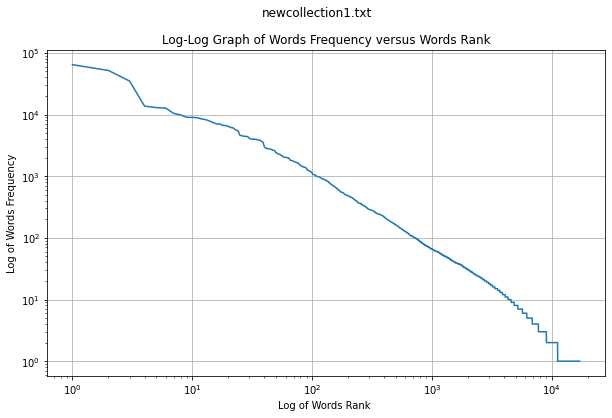

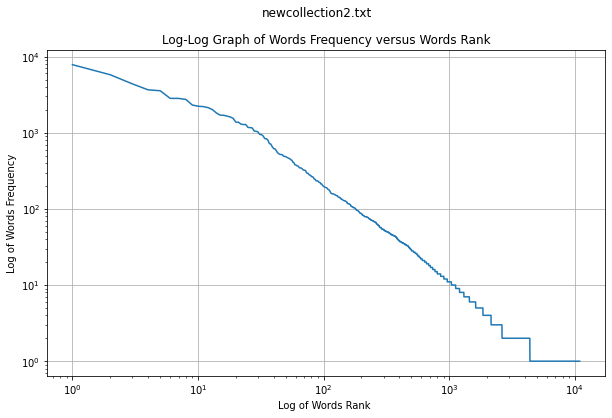

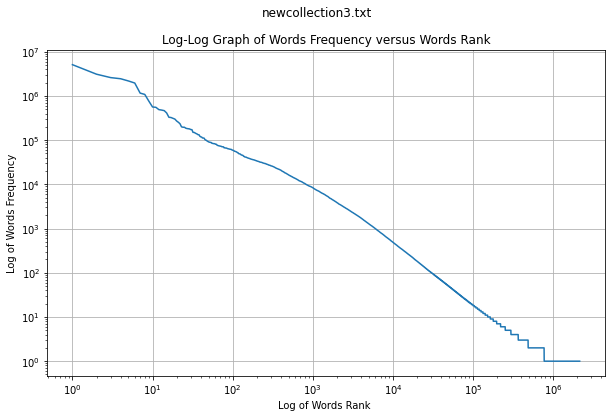

In [30]:
def Zipf_Law(input):
    with open(input, "r") as file:
        words = file.read().lower().split() #Tokenization

    # Create a dictionary for each words and its frequency 
    word_dict= {}
    # Iterate through words and count their occurances
    for word in words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
            
    # Sortting the dictionary descending word frequency
    sorted_word_freq = sorted(word_dict.items(), key=lambda item: item[1], reverse=True)
    descending_word_freq = dict(sorted_word_freq)

    # Create an array to store word frequencies and ranks
    word_frequencies = []
    word_ranks = []

    # Getting the ranks based on the decending order of word frequency
    rank = 1
    for word, frequency in descending_word_freq.items():
        word_frequencies.append(frequency)
        word_ranks.append(rank)
        rank += 1

    # Plot the log-log graph
    plt.figure(figsize=(10, 6))
    plt.loglog(word_ranks, word_frequencies)
    plt.xlabel("Log of Words Rank ")
    plt.ylabel("Log of Words Frequency")
    plt.title("Log-Log Graph of Words Frequency versus Words Rank")
    plt.suptitle(input)
    plt.grid(True)
    plt.show()

Zipf_Law("newcollection1.txt")
Zipf_Law("newcollection2.txt")
Zipf_Law("newcollection3.txt")


#### Report:

According to the 3 graphs above, the more words appear in the documents, the more linear the relationship between words frequency and words rank is. If we have more words, we will tend to have more rare words appearing (flat slope in the end of the plots) and more frequent stopwords such as "the", "of", "and", and so on in the document. In collection 1, the number of frequent words drops significantly in the first 5 rank. That aligns with the video that the most common word occurs twice as often as the second most frequent word and triple as the third frequent word, and so on. In other words, the frequency of the word in kth rank is approximately proportional to 1/k. In the collection 2, there is a bend pattern in the plot between the rank 10th word to approximately the rank 50th word before the steep line, indicating a transition between common words and uncommon words and there are more variety of common words in the document's vocabulary. In the collection 3, there is a steep slope between the 10th rank word and the 100th rank word, demonstrating that some frequent words cover a large portion of the text. 

### Part 2: Heap's Law
Advice on how to implement:
- read text file term by term, keeping count n (the number of terms read so far). 
- save new terms in a hash as you read the file. With each new term update the vocabulary size v.
- print the values of n and v every once in while. Plot n vs v at the end.


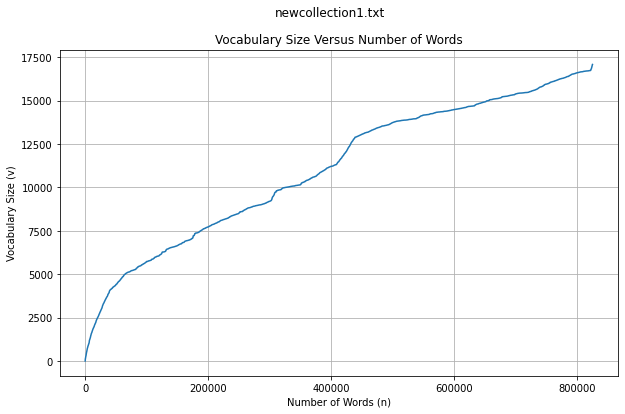

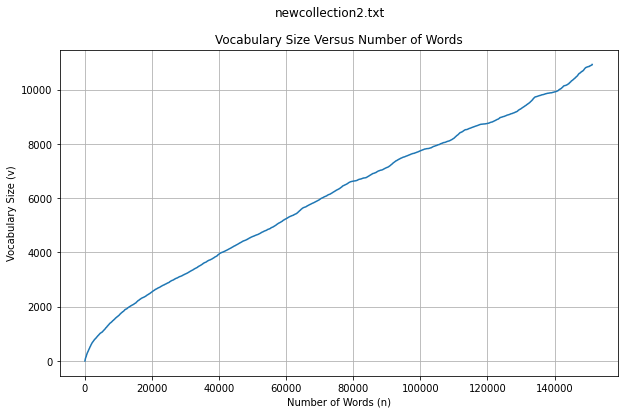

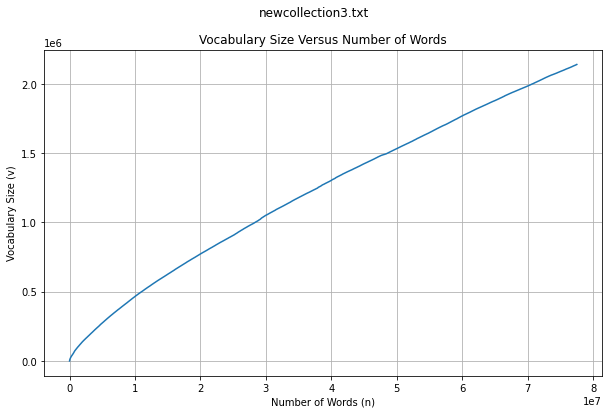

In [18]:
def Heap_Law(input):
    n = 0  #count n (the number of words)
    v = 0   #count v (vocabulary size) 
    # A dictionary (a harsh) to store unique words and their counts
    vocabulary = {}  
    n_array = [] 
    v_array = []  

    with open(input, "r") as file:
        for line in file:
            words = line.strip().lower().split() #Tokenization
            for word in words:
                # Update number of words
                n += 1
                if word not in vocabulary:
                    # Update number of new founded words
                    v += 1 
                    vocabulary[word] = 1
                else:
                    vocabulary[word] += 1

                n_array.append(n)
                v_array.append(v)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(n_array, v_array)
    plt.xlabel('Number of Words (n)')
    plt.ylabel('Vocabulary Size (v)')
    plt.title("Vocabulary Size Versus Number of Words")
    plt.suptitle(input)
    plt.grid(True)
    plt.show()

Heap_Law("newcollection1.txt")
Heap_Law("newcollection2.txt")
Heap_Law("newcollection3.txt")

#### Report:
According to the 3 above plots, it is notice that the bend in early stage tend to get less curl and the slope get steeper when the number of words and vocabilary size increase. And, The vocabulary keep growing fastly then slowing down and reach to a saturate point in the end with a existence of a huge number of words in the document. In other words, adding more words only accounts for a small increase in the vocabulary size. That is in alignment with natural language processing with a large limited vocabulary from the authors. 

The plot of the collection 1 stood out to me compared to the plot of the collection 2 which is pretty similar to the one discussed in the lecture video. When it comes to collection 1, there is a significant steep slope in relationship beween vocabulary size and number of words in the beginning, indicating more unique words in first lines as well as a rapid growth in the vocabulary. And, with a large volume of text in the wiki.txt document (the collection 3), the relationship between vocabulary and number of words seem to be linear. 

### Part 4: Zipf's LAW


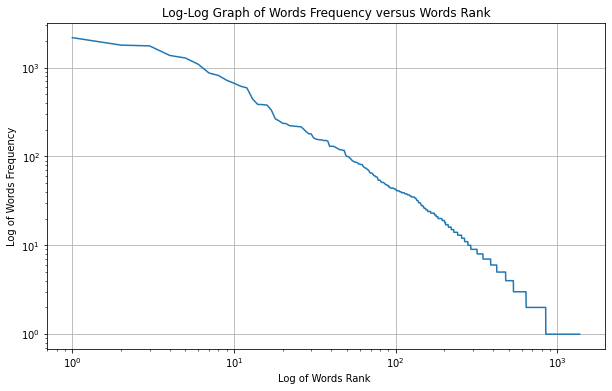

In [23]:
with open("newmaori.txt", "r") as file:
    words = file.read().lower().split() #Tokenization

# Create a dictionary to store word and its frequencies
word_dict= {}
# Iterate through the words and count the word occurances
for word in words:
    if word in word_dict:
        word_dict[word] += 1
    else:
        word_dict[word] = 1
            
# Sortting the dictionary descending word frequency
sorted_word_freq = sorted(word_dict.items(), key=lambda item: item[1], reverse=True)
descending_word_freq = dict(sorted_word_freq)

# Create an array to store word frequencies and ranks
word_frequencies = []
word_ranks = []

# Getting the ranks based on the decending order of word frequency
rank = 1
for word, frequency in descending_word_freq.items():
    word_frequencies.append(frequency)
    word_ranks.append(rank)
    rank += 1

# Plot the log-log graph
plt.figure(figsize=(10, 6))
plt.loglog(word_ranks, word_frequencies)
plt.xlabel("Log of Words Rank ")
plt.ylabel("Log of Words Frequency")
plt.title("Log-Log Graph of Words Frequency versus Words Rank")
plt.grid(True)
plt.show()

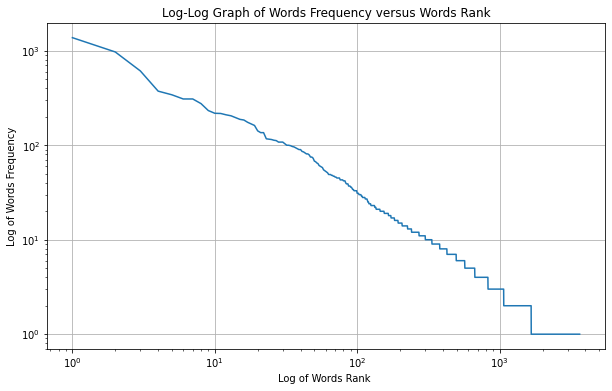

In [22]:
with open("newamuzgo.txt", "r") as file:
    words = file.read().lower().split() #Tokenization

# Create a dictionary to store word and its frequencies
word_dict= {}
# Iterate through the words and count the word occurances
for word in words:
    if word in word_dict:
        word_dict[word] += 1
    else:
        word_dict[word] = 1
            
# Sortting the dictionary descending word frequency
sorted_word_freq = sorted(word_dict.items(), key=lambda item: item[1], reverse=True)
descending_word_freq = dict(sorted_word_freq)

# Create an array to store word frequencies and ranks
word_frequencies = []
word_ranks = []

# Getting the ranks based on the decending order of word frequency
rank = 1
for word, frequency in descending_word_freq.items():
    word_frequencies.append(frequency)
    word_ranks.append(rank)
    rank += 1

# Plot the log-log graph
plt.figure(figsize=(10, 6))
plt.loglog(word_ranks, word_frequencies)
plt.xlabel("Log of Words Rank ")
plt.ylabel("Log of Words Frequency")
plt.title("Log-Log Graph of Words Frequency versus Words Rank")
plt.grid(True)
plt.show()

#### Report:

Conclusion for my findings:

In general, the plots show the frequency of common words and the richness in the vocabulary used in a document written in different languages.  It is noticed that some high-frequency words are the majority group words in the context and most of them tend to be stopwords. And, low-frequency words, especially rare word, always occur in the document regardless of the different languages written in the document. In addition, the relationship between words frequency and words rank for high-frequency words in the different languages are not similar in the top of the rank list. Because it depends on the context and the grammar of the document. But, in the end, the occurence of low-frequency words kind of share the same trend (there are lots of flat slopes represents for the entrance of new rare words). 

Compare the plots:

The first and the second plots represent the relationship between words frequency and words rank in Malyo-Polinesian language and Manguean language of Mexico, respectively. After removing punctuation in Malyo-Polinesian language ("maori.txt"), there is a flat slope in the early stage, indicating a large portion of common words, which can be considered stopwords, appear in the context. However, the pattern of early stage seems to be different in the second plot ("amuzgo.txt") when the line turns to be pretty steep. That means there might be less common words occuring in the document. All in all, comparing the 3 languages together, although there are plenty of high-frequency words in the first half of rank list, English appears to be the language with less rare words or less diversity in the entrance of new words or less synonym words used in the document owning to the less occurances of flat slopes in the bottom of rank list. 